# Feature Engineering for Fraud Detection

This notebook demonstrates the feature engineering process using the `FeatureEngineer` class defined in `src/feature_engineering.py`.

In [26]:
import pandas as pd
import sys
import os

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from feature_engineering import FeatureEngineer
from eda_fraud_data import Eda

## Load Data
We will load the processed data which includes the country mapping.

In [27]:
file_path = '../data/processed/Fraud_Data_with_Country.csv'
df = FeatureEngineer.load_data(file_path)

if df is not None:
    print(f"Data Shape: {df.shape}")
    display(df.head())

Data loaded successfully from ../data/processed/Fraud_Data_with_Country.csv
Data Shape: (151112, 12)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown


## Initialize Feature Engineer

In [28]:
fe = FeatureEngineer(df)

## Add Features

We will add the following features:
1. `user_transaction_count`: Number of transactions per user.
2. `purchase_time_hour`: Hour of the purchase.
3. `purchase_time_day_of_week`: Day of the week of the purchase.
4. `time_since_signup`: Time difference between signup and purchase (in seconds).

In [29]:
# Add user transaction count
df = fe.add_user_transaction_count()

# Add time-based features
df = fe.add_time_features()

# Add time since signup
df = fe.add_time_since_signup()

# Display the dataframe with new features
display(df.head())


--- Adding User Transaction Count ---
Feature 'user_transaction_count' added.

--- Adding Time Features ---
Features 'purchase_time_hour' and 'purchase_time_day_of_week' added.

--- Adding Time Since Signup ---
Feature 'purchase_time_since_signup_seconds' (in seconds) added.
Feature 'purchase_time_since_signup_hours' (in hours) added.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,user_transaction_count,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds,purchase_time_since_signup_hours
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown,1,10,6,1763014.0,489.726111
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown,1,17,4,1084823.0,301.339722
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown,1,8,1,749320.0,208.144444
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown,1,21,3,7434634.0,2065.176111
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown,1,7,6,1407619.0,391.005278


## Verify New Features

In [30]:
new_features = ['user_transaction_count','purchase_time_hour', 'purchase_time_day_of_week', 'purchase_time_since_signup_seconds', 'purchase_time_since_signup_hours']
df[new_features].describe()

,user_transaction_count,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds,purchase_time_since_signup_hours
count,151112.0,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,1.0,11.521593,3.011819,4.932029e+06,1370.008125
std,0.0,6.912474,2.006203,3.126263e+06,868.406422
min,1.0,0.000000,0.000000,1.000000e+00,0.000278
25%,1.0,6.000000,1.000000,2.186754e+06,607.431528
50%,1.0,12.000000,3.000000,4.926346e+06,1368.429306
75%,1.0,17.000000,5.000000,7.644524e+06,2123.479028
max,1.0,23.000000,6.000000,1.036797e+07,2879.992222


## From the features description for user_transaction_count It can be seen that there is only one transaction for each user in the dataset. Therefore, this feature will not provide any useful information for our model and will be dropped in the next steps.

In [31]:
df = fe.drop_columns(columns=['user_transaction_count'])


--- Dropping Columns: ['user_transaction_count'] ---
Columns ['user_transaction_count'] dropped.


In [32]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds,purchase_time_since_signup_hours
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown,10,6,1763014.0,489.726111
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown,17,4,1084823.0,301.339722
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown,8,1,749320.0,208.144444
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown,21,3,7434634.0,2065.176111
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown,7,6,1407619.0,391.005278


## Now we will see the influence of the new features on the fraud rate

In [33]:
# Initialize EDA
eda = Eda(df)

In [34]:
eda.basic_exploration()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   user_id                             151112 non-null  int64         
 1   signup_time                         151112 non-null  datetime64[ns]
 2   purchase_time                       151112 non-null  datetime64[ns]
 3   purchase_value                      151112 non-null  int64         
 4   device_id                           151112 non-null  object        
 5   source                              151112 non-null  object        
 6   browser                             151112 non-null  object        
 7   sex                                 151112 non-null  object        
 8   age                                 151112 non-null  int64         
 9   ip_address                          151112 non-null  int64     

In [35]:
# let's check for missing values
eda.check_missing_values()


--- Missing Values ---
user_id                               0
signup_time                           0
purchase_time                         0
purchase_value                        0
device_id                             0
source                                0
browser                               0
sex                                   0
age                                   0
ip_address                            0
class                                 0
country                               0
purchase_time_hour                    0
purchase_time_day_of_week             0
purchase_time_since_signup_seconds    0
purchase_time_since_signup_hours      0
dtype: int64
No missing values found.



--- Statistics for purchase_time_hour (Binned) ---
                    count      mean
purchase_time_hour                 
(-0.023, 1.15]      12414  0.089657
(1.15, 2.3]          6338  0.091985
(2.3, 3.45]          6458  0.095076
(3.45, 4.6]          6050  0.082975
(4.6, 5.75]          6189  0.089837
(5.75, 6.9]          6380  0.093103
(6.9, 8.05]         12568  0.094924
(8.05, 9.2]          6418  0.105796
(9.2, 10.35]         6100  0.099672
(10.35, 11.5]        6327  0.089142
(11.5, 12.65]        6403  0.094331
(12.65, 13.8]        6292  0.090750
(13.8, 14.95]        6355  0.095201
(14.95, 16.1]       12678  0.098912
(16.1, 17.25]        6466  0.107485
(17.25, 18.4]        6252  0.095649
(18.4, 19.55]        6299  0.096841
(19.55, 20.7]        6221  0.081820
(20.7, 21.85]        6224  0.091099
(21.85, 23.0]       12680  0.089274


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:182: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = self.df.groupby(binned_series)[target].agg(['count', 'mean'])
c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


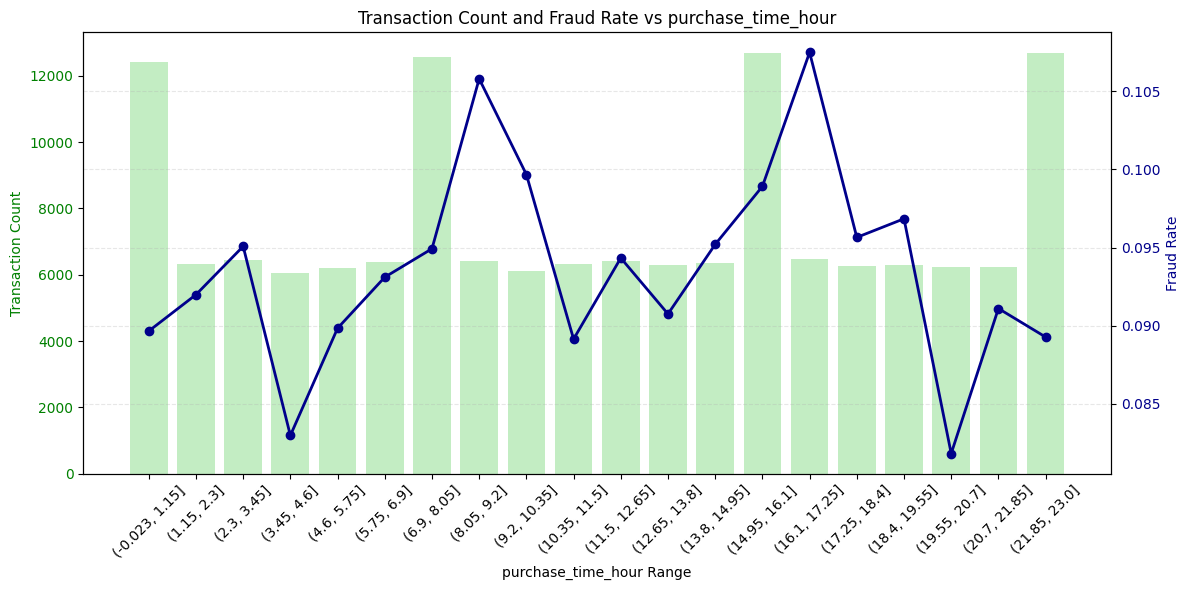


--- Statistics for purchase_time_day_of_week ---
                           count      mean
purchase_time_day_of_week                 
4                          21522  0.101849
6                          22015  0.100931
5                          21648  0.099270
3                          21586  0.098165
0                          21711  0.096219
2                          21316  0.080268
1                          21314  0.078305


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


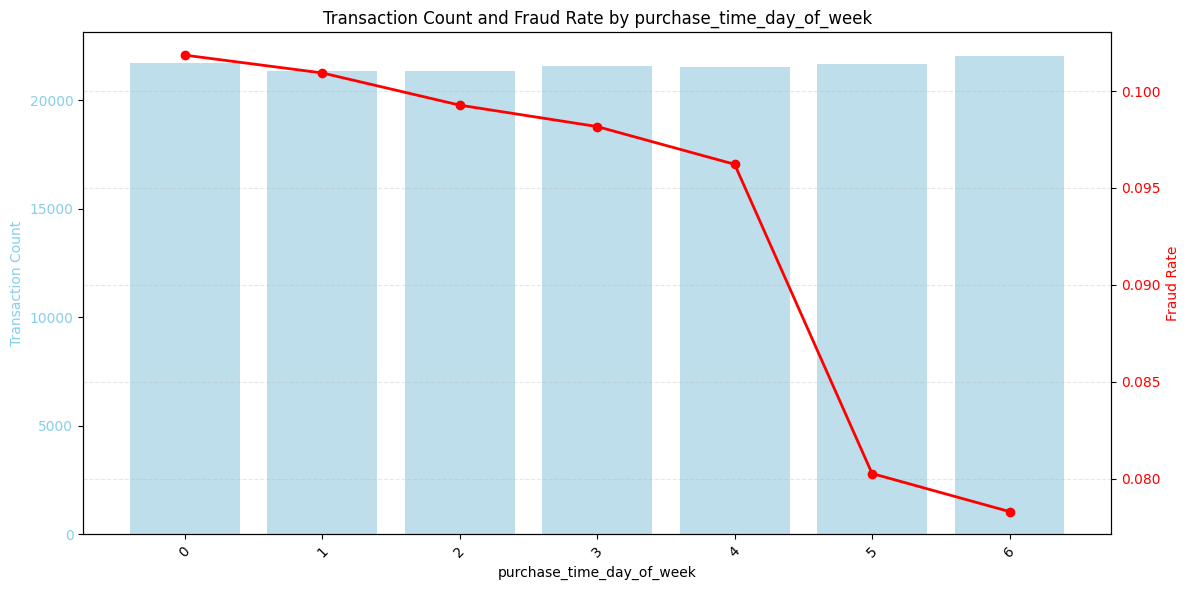


--- Statistics for purchase_time_since_signup_seconds (Binned) ---
                                    count      mean
purchase_time_since_signup_seconds                 
(-10366.971, 518399.55]             14657  0.540015
(518399.55, 1036798.1]               7034  0.043361
(1036798.1, 1555196.65]              7127  0.046022
(1555196.65, 2073595.2]              7356  0.043502
(2073595.2, 2591993.75]              7295  0.043866
(2591993.75, 3110392.3]              7078  0.051568
(3110392.3, 3628790.85]              7031  0.048215
(3628790.85, 4147189.4]              7183  0.043297
(4147189.4, 4665587.95]              7129  0.045448
(4665587.95, 5183986.5]              7284  0.044206
(5183986.5, 5702385.05]              7220  0.043629
(5702385.05, 6220783.6]              7125  0.046035
(6220783.6, 6739182.15]              7235  0.044921
(6739182.15, 7257580.7]              7252  0.046470
(7257580.7, 7775979.25]              7110  0.045148
(7775979.25, 8294377.8]              7213  0.041

c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:182: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = self.df.groupby(binned_series)[target].agg(['count', 'mean'])
c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


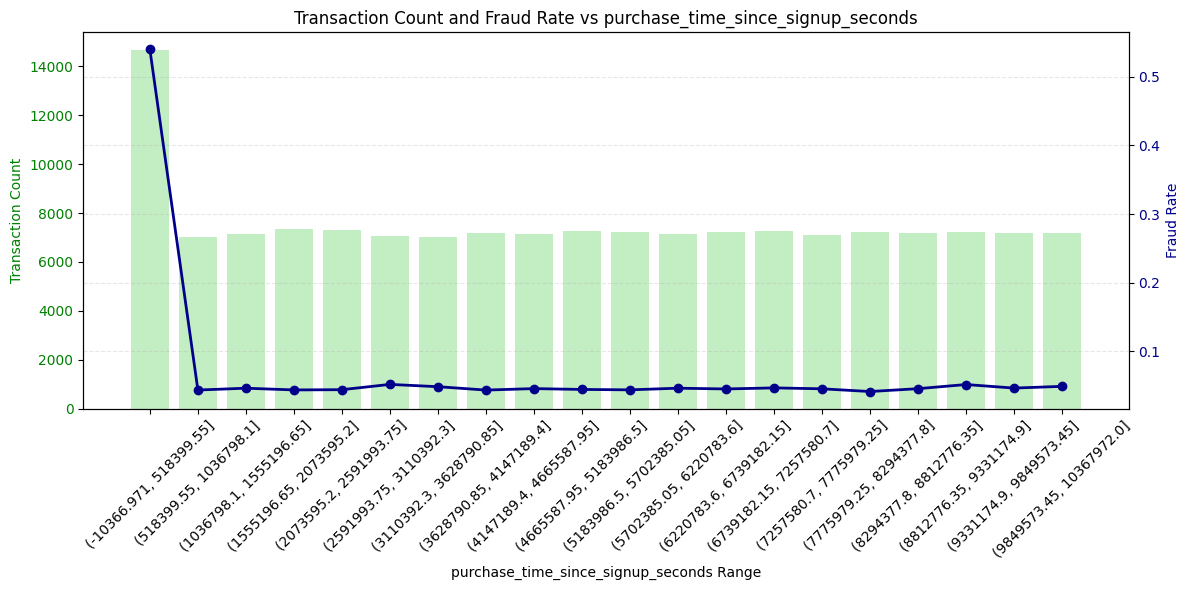

c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:182: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = self.df.groupby(binned_series)[target].agg(['count', 'mean'])
c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)



--- Statistics for purchase_time_since_signup_hours (Binned) ---
                                  count      mean
purchase_time_since_signup_hours                 
(-2.88, 144.0]                    14657  0.540015
(144.0, 287.999]                   7034  0.043361
(287.999, 431.999]                 7127  0.046022
(431.999, 575.999]                 7356  0.043502
(575.999, 719.998]                 7295  0.043866
(719.998, 863.998]                 7078  0.051568
(863.998, 1007.997]                7031  0.048215
(1007.997, 1151.997]               7183  0.043297
(1151.997, 1295.997]               7129  0.045448
(1295.997, 1439.996]               7284  0.044206
(1439.996, 1583.996]               7220  0.043629
(1583.996, 1727.995]               7125  0.046035
(1727.995, 1871.995]               7235  0.044921
(1871.995, 2015.995]               7252  0.046470
(2015.995, 2159.994]               7110  0.045148
(2159.994, 2303.994]               7213  0.041176
(2303.994, 2447.993]              

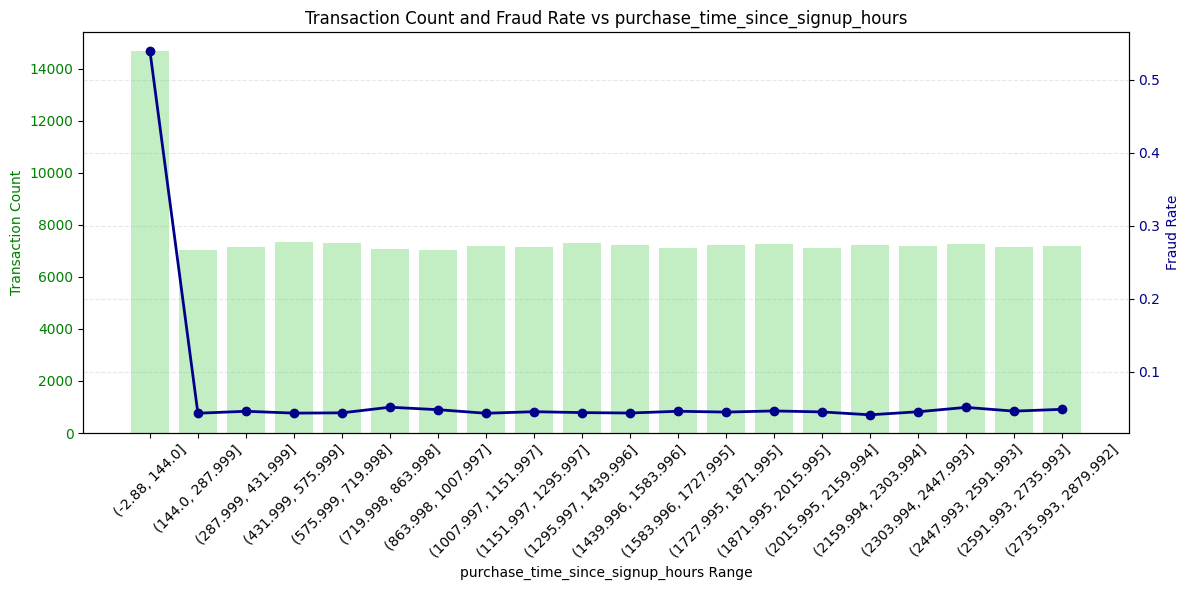

In [36]:
new_features = ['purchase_time_hour', 'purchase_time_day_of_week', 'purchase_time_since_signup_seconds', 'purchase_time_since_signup_hours']
for feature in new_features:
    if feature =="purchase_time_day_of_week":
        eda.eda_bivariate_categorical(feature=feature)
    else:
        eda.eda_bivariate_continuous(feature=feature, bins=20)

## Bivariate Analysis of New Features
## Purchase Time Hour -early hours 8-9 and hours around 16-17 have higher fraud rates despite having lower transaction counts. This could indicate that fraudsters are targeting these times specifically.
## Purchase Time Day of Week - Weekdays especially Mon, Tue, and Wed have higher fraud rates compared to weekends. This suggests that fraudsters may be more active during the workweek when users are more likely to be making transactions. However, transactions are higher on weekends. On weekends the fraud rate significantly drops.
## Time Since Signup in Seconds - There is a noticeable spike in fraud rate for transactions made very soon after signup (within the first few hours). The hours up to 144 show the highest peak and then there is a significant drop.  This could indicate that fraudsters are creating new accounts to make quick fraudulent transactions before being detected.


In [37]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds,purchase_time_since_signup_hours
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,Unknown,10,6,1763014.0,489.726111
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,Unknown,17,4,1084823.0,301.339722
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,Unknown,8,1,749320.0,208.144444
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,Unknown,21,3,7434634.0,2065.176111
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,Unknown,7,6,1407619.0,391.005278


## Save Feature Engineered Data

## Standardization

We will now standardize numerical features:
- **Standardization**: We'll use `StandardScaler` for numerical features like `purchase_value`, `age`, and `purchase_time_since_signup_seconds`.


--- Feature Statistics (Current) ---
                                            mean           std   min  \
purchase_value                      3.693537e+01  1.832276e+01   9.0   
age                                 3.314070e+01  8.617733e+00  18.0   
purchase_time_since_signup_seconds  4.932029e+06  3.126263e+06   1.0   

                                           max  
purchase_value                           154.0  
age                                       76.0  
purchase_time_since_signup_seconds  10367972.0  

--- Plotting Pre vs Post Distributions ---

--- Normalizing Features (standard) ---
Scaled columns: ['purchase_value', 'age', 'purchase_time_since_signup_seconds']

--- Feature Statistics (Current) ---
                                            mean       std       min       max
purchase_value                      3.709952e-17  1.000003 -1.524632  6.389048
age                                 8.712979e-17  1.000003 -1.756930  4.973400
purchase_time_since_signup_seconds -1

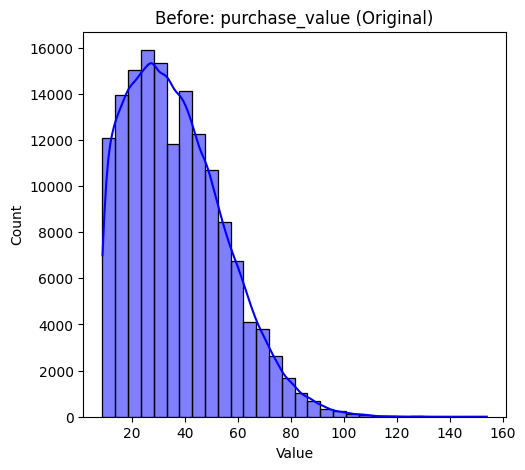

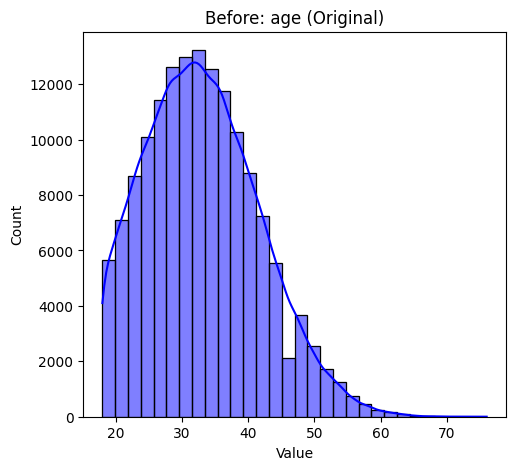

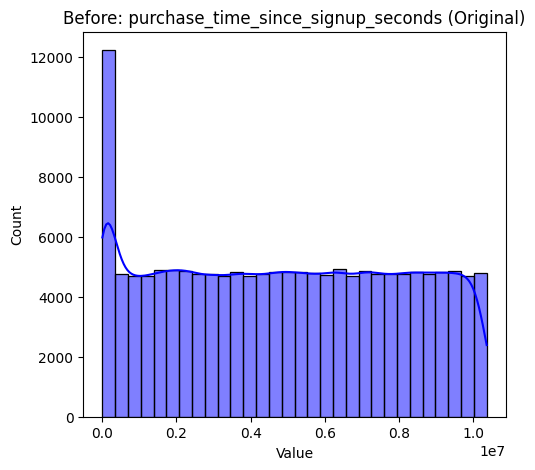

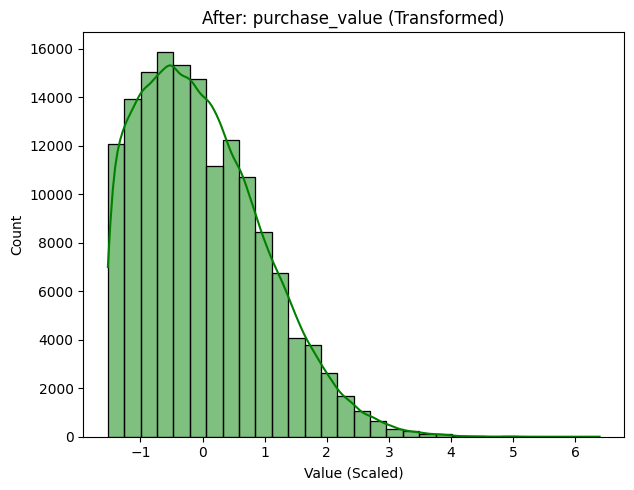

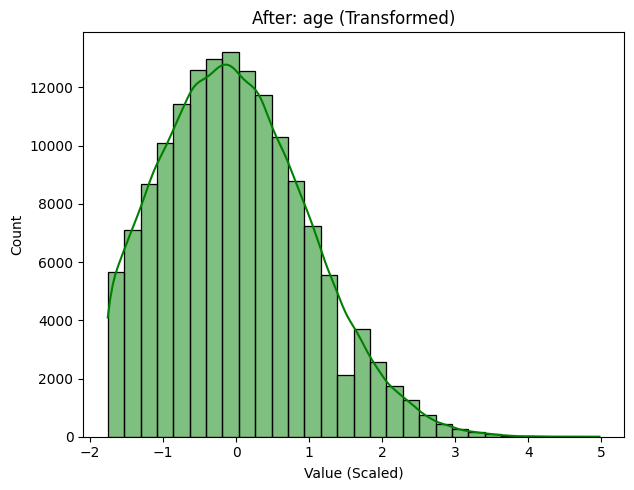

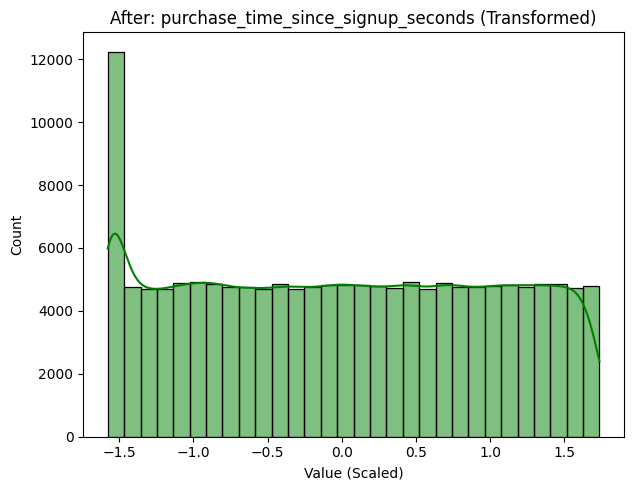

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds,purchase_time_since_signup_hours
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,0.494721,ZCLZTAJPCRAQX,Direct,Safari,M,0.331793,52093,0,Unknown,10,6,-1.013679,489.726111
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,-0.214781,YFGYOALADBHLT,Ads,IE,F,-0.364448,93447,0,Unknown,17,4,-1.230613,301.339722
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,-0.214781,QZNVQTUITFTHH,Direct,FireFox,F,-0.132367,105818,0,Unknown,8,1,-1.337931,208.144444
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,-0.214781,PIBUQMBIELMMG,Ads,IE,M,0.795954,117566,0,Unknown,21,3,0.800513,2065.176111
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,0.985915,WFIIFCPIOGMHT,Ads,Safari,M,0.563874,131423,0,Unknown,7,6,-1.127359,391.005278


In [38]:
# 1. Normalize Numerical Features (StandardScaler)
# We EXCLUDE purchase_time_hour and purchase_time_day_of_week as they are cyclical/categorical.
scale_cols = ['purchase_value', 'age', 'purchase_time_since_signup_seconds']

# first let's see the distribution of these columns before normalization
fe.check_feature_stats(scale_cols)
fe.plot_pre_post_distribution(df,scale_cols, isBefore=True)

#now let's normalize
df = fe.normalize_features(scale_cols, method='standard')

#let's see the result
fe.check_feature_stats(scale_cols)
fe.plot_pre_post_distribution(df,scale_cols, isBefore=False)

#let's see the dataframe
df.head()

## We can see from the plots that after standardization, the age,purchase_value and purchase_time_since_signup_seconds have a mean of 0 and a standard deviation of 1, indicating successful standardization. The min,max, mean and std values from the statistics table also confirm this.

In [39]:
#let's drop the  purchase_time_since_signup_hours column
df = fe.drop_columns(columns=['purchase_time_since_signup_hours'])
df.head()


--- Dropping Columns: ['purchase_time_since_signup_hours'] ---
Columns ['purchase_time_since_signup_hours'] dropped.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_time_hour,purchase_time_day_of_week,purchase_time_since_signup_seconds
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,0.494721,ZCLZTAJPCRAQX,Direct,Safari,M,0.331793,52093,0,Unknown,10,6,-1.013679
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,-0.214781,YFGYOALADBHLT,Ads,IE,F,-0.364448,93447,0,Unknown,17,4,-1.230613
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,-0.214781,QZNVQTUITFTHH,Direct,FireFox,F,-0.132367,105818,0,Unknown,8,1,-1.337931
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,-0.214781,PIBUQMBIELMMG,Ads,IE,M,0.795954,117566,0,Unknown,21,3,0.800513
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,0.985915,WFIIFCPIOGMHT,Ads,Safari,M,0.563874,131423,0,Unknown,7,6,-1.127359


- **Encoding**: 
    - `OneHotEncoder` (via `get_dummies`) for low-cardinality categorical features like `source`, `browser`, `sex`. 
    - `Frequency Encoding` for high-cardinality features like `country`.
    - `Cyclical encoding` for time features like `purchase_time_hour` and `purchase_time_day_of_week`.

In [40]:
# 2. Encode Categorical Features
# One-Hot Encoding for low cardinality
categorical_cols_onehot = ['source', 'browser', 'sex']
df = fe.encode_categorical_features(categorical_cols_onehot, method='onehot')

# Frequency Encoding for high cardinality (country)
# This replaces the country name with its probability of occurrence, avoiding 180+ new columns.
categorical_cols_freq = ['country']
df = fe.encode_categorical_features(categorical_cols_freq, method='frequency')

# 3. Cyclical Encoding for time features
cyclical_cols = ['purchase_time_hour', 'purchase_time_day_of_week']
max_values = {'purchase_time_hour': 23, 'purchase_time_day_of_week': 6}  # 0-23 for hours, 0-6 for days
df = fe.cyclical_encode(cyclical_cols,max_vals=max_values)

# df.head()




--- Encoding Categorical Features (onehot) ---
One-hot encoded: ['source', 'browser', 'sex']

--- Encoding Categorical Features (frequency) ---
Frequency encoded: ['country']

--- Applying Cyclical Encoding ---
Encoded purchase_time_hour -> purchase_time_hour_sin, purchase_time_hour_cos
Encoded purchase_time_day_of_week -> purchase_time_day_of_week_sin, purchase_time_day_of_week_cos


In [41]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   user_id                             151112 non-null  int64         
 1   signup_time                         151112 non-null  datetime64[ns]
 2   purchase_time                       151112 non-null  datetime64[ns]
 3   purchase_value                      151112 non-null  float64       
 4   device_id                           151112 non-null  object        
 5   age                                 151112 non-null  float64       
 6   ip_address                          151112 non-null  int64         
 7   class                               151112 non-null  int64         
 8   country                             151112 non-null  float64       
 9   purchase_time_since_signup_seconds  151112 non-null  float64       
 10  source_D

In [42]:
# let's drop the unecessary columns
columns_to_drop = ['user_id', 'purchase_time', 'signup_time',"device_id","ip_address"]
df = fe.drop_columns(columns=columns_to_drop)




--- Dropping Columns: ['user_id', 'purchase_time', 'signup_time', 'device_id', 'ip_address'] ---
Columns ['user_id', 'purchase_time', 'signup_time', 'device_id', 'ip_address'] dropped.


In [43]:
#final dataframe
df.head()

,purchase_value,age,class,country,purchase_time_since_signup_seconds,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,purchase_time_hour_sin,purchase_time_hour_cos,purchase_time_day_of_week_sin,purchase_time_day_of_week_cos
0,0.494721,0.331793,0,0.145362,-1.013679,1,0,0,0,0,1,1,0.398401,-0.917211,-2.449294e-16,1.0
1,-0.214781,-0.364448,0,0.145362,-1.230613,0,0,0,1,0,0,0,-0.997669,-0.068242,-8.660254e-01,-0.5
2,-0.214781,-0.132367,0,0.145362,-1.337931,1,0,1,0,0,0,0,0.816970,-0.576680,8.660254e-01,0.5
3,-0.214781,0.795954,0,0.145362,0.800513,0,0,0,1,0,0,1,-0.519584,0.854419,1.224647e-16,-1.0
4,0.985915,0.563874,0,0.145362,-1.127359,0,0,0,0,0,1,1,0.942261,-0.334880,-2.449294e-16,1.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   purchase_value                      151112 non-null  float64
 1   age                                 151112 non-null  float64
 2   class                               151112 non-null  int64  
 3   country                             151112 non-null  float64
 4   purchase_time_since_signup_seconds  151112 non-null  float64
 5   source_Direct                       151112 non-null  int64  
 6   source_SEO                          151112 non-null  int64  
 7   browser_FireFox                     151112 non-null  int64  
 8   browser_IE                          151112 non-null  int64  
 9   browser_Opera                       151112 non-null  int64  
 10  browser_Safari                      151112 non-null  int64  
 11  sex_M                     

In [45]:
#save the engineered dataset
output_path = '../data/processed/Fraud_Data_Engineered.csv'
df.to_csv(output_path, index=False)

# Now we are ready to balance the dataset and train the model


## Handling Class Imbalance (SMOTE)

We will use **SMOTE (Synthetic Minority Over-sampling Technique)** to handle the class imbalance.
- **Why SMOTE?**: It creates synthetic examples of the minority class (Fraud) rather than just duplicating them, which helps prevent overfitting.
- **Why Training Data Only?**: We must split the data **before** resampling. If we resample the entire dataset, synthetic points based on the test set will leak into the training set (Data Leakage), leading to invalid results.

**Steps:**
1. Separate features (X) and target (y).
2. Split into Train (80%) and Test (20%) sets.
3. Apply SMOTE to `X_train` and `y_train`.
4. Leave `X_test` and `y_test` untouched to ensure a fair evaluation.

In [46]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Prepare X and y
y = df['class']
#we only drop the target column 'class' as other unnecessary columns have already been removed
X = df.drop(columns=['class'])


print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 2. Split Data (80% Train, 20% Test)
# Stratify ensures the class proportion is preserved in the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Apply SMOTE to Training Data Only
print("\n--- Class Distribution Before SMOTE (Train) ---")
print(y_train.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Class Distribution After SMOTE (Train) ---")
print(y_train_resampled.value_counts(normalize=True))

print(f"\nOriginal Train Shape: {X_train.shape}")
print(f"Resampled Train Shape: {X_train_resampled.shape}")

Features shape: (151112, 15)
Target shape: (151112,)

--- Class Distribution Before SMOTE (Train) ---
class
0    0.906352
1    0.093648
Name: proportion, dtype: float64

--- Class Distribution After SMOTE (Train) ---
class
0    0.5
1    0.5
Name: proportion, dtype: float64

Original Train Shape: (120889, 15)
Resampled Train Shape: (219136, 15)

--- Class Distribution After SMOTE (Train) ---
class
0    0.5
1    0.5
Name: proportion, dtype: float64

Original Train Shape: (120889, 15)
Resampled Train Shape: (219136, 15)


# We need to save X_train_resampled, y_train_resampled and X_test, y_test for model training and evaluation


In [47]:
# Define save directory
processed_dir = '../data/processed'

# Save the resampled training data (ready for model training)
# We use .csv for X to keep column names, which is helpful for analysis

print("\n--- Saving Data to CSV ---")
X_train_resampled.to_csv(processed_dir + "/Fraud_Data_X_train_resampled.csv", index=False)
y_train_resampled.to_csv(processed_dir + "/Fraud_Data_y_train_resampled.csv", index=False)
X_test.to_csv(processed_dir + "/Fraud_Data_X_test.csv", index=False)
y_test.to_csv(processed_dir + "/Fraud_Data_y_test.csv", index=False)

print(f"Saved train/test datasets to {processed_dir}")



--- Saving Data to CSV ---
Saved train/test datasets to ../data/processed
Saved train/test datasets to ../data/processed
